In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("drive/MyDrive/OCR For Gujarati Language.rar", outdir=".")


patool: Extracting drive/MyDrive/OCR For Gujarati Language.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/OCR For Gujarati Language.rar"
patool:     with cwd='.'
patool: ... drive/MyDrive/OCR For Gujarati Language.rar extracted to `.'.


'.'

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import os
from tqdm import tqdm

print(tf.__version__)

2.6.0


In [ ]:

CATEGORIES = sorted(list(os.listdir('./OCR For Gujarati Language/Dataset/Gujarati Characters Dataset Photos/28x28/')))
IMG_SIZE = 64
training_data = []

In [ ]:
CATEGORIES

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'અ',
 'અં',
 'અઃ',
 'આ',
 'ઇ',
 'ઈ',
 'ઉ',
 'ઊ',
 'ઋ',
 'એ',
 'ઐ',
 'ઓ',
 'ઔ',
 'ક',
 'કં',
 'કઃ',
 'કા',
 'કિ',
 'કી',
 'કુ',
 'કૂ',
 'કૃ',
 'કે',
 'કૈ',
 'કો',
 'કૌ',
 'ક્ષ',
 'ક્ષા',
 'ક્ષિ',
 'ક્ષી',
 'ક્ષુ',
 'ક્ષૂ',
 'ક્ષે',
 'ક્ષૈ',
 'ક્ષો',
 'ખ',
 'ખા',
 'ખિ',
 'ખી',
 'ખુ',
 'ખૂ',
 'ખે',
 'ખૈ',
 'ખો',
 'ખૌ',
 'ગ',
 'ગા',
 'ગિ',
 'ગી',
 'ગુ',
 'ગૂ',
 'ગે',
 'ગૈ',
 'ગો',
 'ગૌ',
 'ઘ',
 'ઘા',
 'ઘિ',
 'ઘી',
 'ઘુ',
 'ઘૂ',
 'ઘે',
 'ઘૈ',
 'ઘો',
 'ઘૌ',
 'ચ',
 'ચા',
 'ચિ',
 'ચી',
 'ચુ',
 'ચૂ',
 'ચે',
 'ચૈ',
 'ચો',
 'ચૌ',
 'છ',
 'છા',
 'છિ',
 'છી',
 'છુ',
 'છૂ',
 'છે',
 'છૈ',
 'છો',
 'છૌ',
 'જ',
 'જા',
 'જિ',
 'જી',
 'જુ',
 'જૂ',
 'જે',
 'જૈ',
 'જો',
 'જૌ',
 'જ્ઞ',
 'જ્ઞા',
 'જ્ઞિ',
 'જ્ઞી',
 'જ્ઞુ',
 'જ્ઞૂ',
 'જ્ઞે',
 'જ્ઞૈ',
 'જ્ઞો',
 'ઝ',
 'ઝા',
 'ઝિ',
 'ઝી',
 'ઝુ',
 'ઝૂ',
 'ઝે',
 'ઝૈ',
 'ઝો',
 'ઝૌ',
 'ઞ',
 'ટ',
 'ટા',
 'ટિ',
 'ટી',
 'ટુ',
 'ટૂ',
 'ટે',
 'ટૈ',
 'ટો',
 'ટૌ',
 'ઠ',
 'ઠા',
 'ઠિ',
 'ઠી',
 'ઠુ',
 'ઠૂ',
 'ઠે',
 'ઠૈ

In [ ]:
def create_training_data(DATADIR):
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)  # create path to dataset
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):  # iterate over each image per alphbets
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  #size to normalize data size
                """for i in range(len(img)):
                    for j in range(len(img[0])):
                        img[i][j] = 255 - img[i][j]"""
                training_data.append([img, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                print(e)
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
            

In [ ]:
create_training_data('./OCR For Gujarati Language/Dataset/Gujarati Characters Dataset Photos/28x28')

100%|██████████| 12/12 [00:00<00:00, 9455.50it/s]
0it [00:00, ?it/s]
100%|██████████| 12/12 [00:00<00:00, 5928.34it/s]
0it [00:00, ?it/s]
100%|██████████| 12/12 [00:00<00:00, 6256.26it/s]
0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 5602.86it/s]
0it [00:00, ?it/s]
100%|██████████| 12/12 [00:00<00:00, 6072.10it/s]
0it [00:00, ?it/s]
100%|██████████| 12/12 [00:00<00:00, 6138.75it/s]
0it [00:00, ?it/s]
100%|██████████| 12/12 [00:00<00:00, 6356.61it/s]
0it [00:00, ?it/s]
100%|██████████| 12/12 [00:00<00:00, 7086.97it/s]
0it [00:00, ?it/s]
100%|██████████| 12/12 [00:00<00:00, 7653.84it/s]
0it [00:00, ?it/s]
100%|██████████| 12/12 [00:00<00:00, 6083.84it/s]
0it [00:00, ?it/s]
100%|██████████| 11/11 [00:00<00:00, 6053.18it/s]
0it [00:00, ?it/s]
100%|██████████| 11/11 [00:00<00:00, 6624.17it/s]
0it [00:00, ?it/s]
100%|██████████| 12/12 [00:00<00:00, 7524.54it/s]
0it [00:00, ?it/s]
100%|██████████| 3/3 [00:00<00:00, 4565.64it/s]
0it [00:00, ?it/s]
100%|██████████| 13/13 [00:00<00:00,

In [ ]:
pickle_out = open("GujaratiData.pickle","wb")
pickle.dump(training_data, pickle_out)
pickle_out.close()

#loading data from pickle file
pickle_in = open("GujaratiData.pickle","rb")
training_data = pickle.load(pickle_in)

print(training_data[0][0].shape)


(64, 64)


155
195
23
31
126
14
16
223
13
149
195
(64, 64, 1)
ષુ


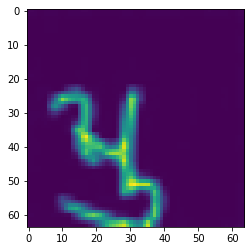

In [ ]:
#randomize data
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)
Y = np.array(Y).reshape(X.shape[0],)

seed = 785

# split the data into training (80%) and testing (20%)
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.20, random_state=seed)
print(Y[1])

X_train = X_train.reshape(X_train.shape[0], IMG_SIZE, IMG_SIZE, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], IMG_SIZE, IMG_SIZE, 1).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

num_classes = Y_test.shape[1]
plt.imshow(X_train[10][:,:,0])
print(X_train[0].shape)
print(CATEGORIES[np.argmax(Y_train[10])])


In [ ]:
model = Sequential()
       
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=100))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
        
       
        
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
#%%
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=64, verbose=2)




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

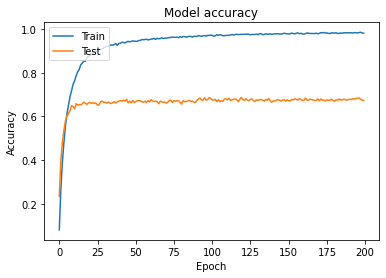

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


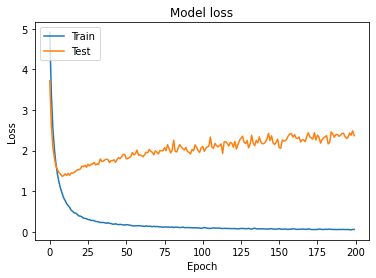

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [ ]:
#%%
#model evaluation
val_loss, val_acc = model.evaluate(X_test, Y_test)
print(val_loss)
print(val_acc)


134/134 [==============================] - 7s 55ms/step - loss: 2.3665 - accuracy: 0.6730
2.366535186767578
0.6729780435562134


INFO:tensorflow:Assets written to: GujaratiOCRModel/assets
અઃ


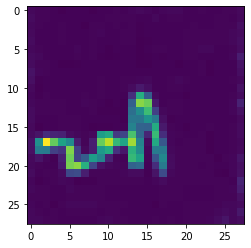

In [ ]:
model.save('GujaratiOCRModel')
#load saved model
new_model = tf.keras.models.load_model('GujaratiOCRModel')

#predict image on test data
predictions = new_model.predict(X_test)

print(CATEGORIES[np.argmax(predictions[160])])

img = cv2.resize(X_test[160], (28,28))

plt.imshow(img)